<a href="https://colab.research.google.com/github/iodicesara/Identity-Mapping-ResNet-Lasagne/blob/master/week02_NetworkTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Training

In this tutorial we will introduce different topics related to the traning phase of deep neural networks,  including data augmentations, optimization/regularization techniques, weight initializations, loss function, hyper parameters tuning and final, some metrics to evaluate performances of the model.

## Preliminary

We will load MNIST as in last weeks tutorial, and we will use it to classify digits and introduce the topics covered in this tutorial.

In [38]:
import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from keras.datasets import mnist

batch_size=128
num_classes=10
epoch=20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train.shape[0],'train samples')
print(x_train.shape[0],'train samples')

print(x_test.shape[0],'test samples')
print(x_test.shape[0],'test samples')

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)




# con

# Load simple model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.summary()


(60000, 'train samples')
(60000, 'train samples')
(10000, 'test samples')
(10000, 'test samples')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_34 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Optimizers


The choice of the optimizer can affect both the final performance and the speed of convergence. While some methods are more prone to get stuck in local minima,  others converge faster.  A nice visualization of this is the following animation:

![](http://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif)

If you want to know more technical details of different optimizers, plese refer to [Sebastian Ruder's blog](http://ruder.io/optimizing-gradient-descent/).

Here we will introduce how to use different optimizers in Keras. 

As we have previusly seen, the compile method requires two arguments in string format: a loss function and a optimizer. For example, we define as parameters adam and categorical crossentropy, respectively. 

As a rule of thumb, Adam is usually easier to tune due to the adaptive learning rate, whereas SGD with momentum has been shown to reach better results when tuned correctly.

As exercise, try different optimizers - to know how to specify it please consult the official documentation [Optimizers in Keras](https://keras.io/optimizers/) - and finally, report below in the table the training and validation losses you achieve.





In [59]:
from IPython.display import HTML, display
import tabulate
table = [["Optimizer","loss","val_loss","hyper-parameters"],
         ["Adam","-","-","-"],
         ["Sgd","-","-","lr=0.01, momentum=0.0, decay=0.0"],
         ["RMSprop","-" ,"-","lr=0.001, rho=0.9, epsilon=None, decay=0.0"],
         ["Adagrad","-","-","-"],
         ["Adadelta","-","-","-"],
         ["Adam","-","-","-"]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Optimizer,loss,val_loss,hyper-parameters
Adam,-,-,-
Sgd,-,-,"lr=0.01, momentum=0.0, decay=0.0"
RMSprop,-,-,"lr=0.001, rho=0.9, epsilon=None, decay=0.0"
Adagrad,-,-,-
Adadelta,-,-,-
Adam,-,-,-


In [39]:
model.compile(optimizer='adam',loss='categorical_crossentropy')
model.fit(x_train,y_train,batch_size=100,epochs=100,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2101 - val_loss: 0.1029
Epoch 2/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0783 - val_loss: 0.0889
Epoch 3/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0506 - val_loss: 0.0628
Epoch 4/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0342 - val_loss: 0.0688
Epoch 5/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0297 - val_loss: 0.0710
Epoch 6/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0217 - val_loss: 0.0782
Epoch 7/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0192 - val_loss: 0.0665
Epoch 8/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0166 - val_loss: 0.0814
Epoch 9/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.0172 - val_loss: 0.

## Backpropagation
EXPLAIN, AND SHOW Keras example of implementation



## Initializers

Different weights initializations may lead to different minimia reached. They are usally initialized at random, however there are several algorithms that can be used. 

## Losses

### Classification

For classification problems, the standard loss used is the cross-entropy loss, which is defined as:

### Regression
For regression problems, it is quite standard to use Mean Squared Error or Mean Absolute Error, depending on the problem.

## Regularizations

## HyperParameters Tuning

There are several parameters in the training process that can be modified. One of the most important is the training rate, which controls the update step performed during the backpropagation.

## Data augmentation
Data augmentation techniques such as rotation, color jittering, scale or cropping are usually applied in deep learning pipelines. We take an input image, apply a transformation to it, and then use it for training.

Keras includes a preprocessing module, with all [these transformations](https://keras.io/preprocessing/image/) implemented. The preprocessing module can be imported by doing




In [0]:
from keras.preprocessing.image import ImageDataGenerator

Then we need to fit it to the input data, and use `flow` to apply the transformations to the input data.

We will now visualize some of the transformations available to use.

First we plot some image without any transformation applied for comparison.

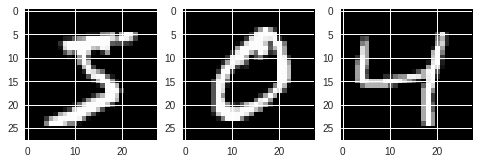

In [0]:
for i in range(0, 3):
	plt.subplot(130 + 1 + i)
	plt.imshow(X_train[i, 0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Rotation
A standard transformation is to rotate the image. We can do so by initializing ImageDataGenerator with `rotation_range=rot_val`.

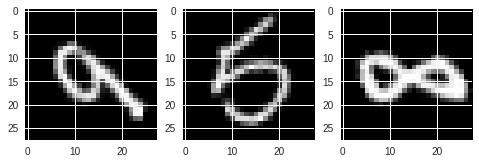

In [0]:
# We first define the transformation we want to apply
augmentation_gen = ImageDataGenerator(rotation_range=90, data_format = 'channels_first')
# We then apply the transformation
augmentation_gen.fit(X_train)
for X_batch, y_batch in augmentation_gen.flow(X_train, y_train, batch_size=3):
	for i in range(0, 3):
		plt.subplot(130 + 1 + i)
		plt.imshow(X_batch[i, 0].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break


### Cropping

One of the standard transformations we can apply is cropping. By cropping, we take a smaller part of the image. Some pipelines do center cropping and some other random cropping, among other variations. However, this is not implemented in Keras, so we need to use a custom transformation:

## Performance metrics

[Available metrics in Keras](https://keras.io/metrics/)

We need some way to evaluate the performance of the model. We do so by using some evaluation metric. Some of the standard evaluation metrics are mean squared error (MSE) and mean absolute error (MAE) for regression problems, or binary or categorical accuracy for classification problems.

### Custom metrics

There are cases where we want to use a non-standard metric for evaluating our models. To

## Monitoring Training

Tensorboard or similars?